In [34]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sb

In [35]:
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [ ]:
df = pd.read_csv("../data/고객db_전처리.csv")

In [37]:
df

,연번,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
0,1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,...,2분기,평일,350,22,33820000,신용카드,오프라인,1,0.002,0.135
1,2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,...,1분기,평일,38,42,89930000,신용카드,오프라인,5,0.508,0.037
2,3,김다은,1999-05-02,26,20대 중반,여,010-6789-0123,kimdaeun26@himedia.co.kr,법인,daeun026,...,1분기,평일,10,26,70990000,계좌이체,오프라인,1,0.161,0.004
3,4,김민수,1960-07-01,65,60대 중반,남,010-1234-5678,kimminsu1@himedia.co.kr,법인,minsu001,...,2분기,평일,689,63,50970000,현금,오프라인,1,0.002,0.130
4,5,김승현,1970-03-02,55,50대 중반,남,010-0123-4567,kimseunghyun20@himedia.co.kr,법인,seunghyun020,...,4분기,주말,536,53,49890000,신용카드,오프라인,1,0.004,0.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,288,신시우,1958-07-11,67,60대 후반,여,042-207-6955,gyeonghyi78@gmail.com,개인,jihungim,...,4분기,평일,90,66,84310000,신용카드,온라인,2,0.011,0.280
287,289,최춘자,1976-06-27,49,40대 후반,여,031-170-7739,hancunja@yu.kr,개인,jinho50,...,3분기,평일,574,47,35670000,현금,오프라인,3,0.047,0.116
288,290,차서준,1968-01-22,57,50대 후반,여,064-741-3740,qgim@simryujo.com,개인,jihun41,...,1분기,평일,433,56,70990000,계좌이체,온라인,2,0.005,0.304
289,291,안정희,1984-01-10,41,40대 초반,남,051-406-1803,donghyeonbae@joyunson.com,개인,yeongil47,...,1분기,평일,415,40,86540000,현금,온라인,2,0.006,0.268


In [38]:
df[['최근 구매 시점', '최근 구매 요일', '최근 거래 금액']]

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,2분기,평일,33820000
1,1분기,평일,89930000
2,1분기,평일,70990000
3,2분기,평일,50970000
4,4분기,주말,49890000
...,...,...,...
286,4분기,평일,84310000
287,3분기,평일,35670000
288,1분기,평일,70990000
289,1분기,평일,86540000


In [39]:
# groupby 하기
# 최근 구매 시점을 groupby 하고, 최근 구매 시점에 대한 최근 거래 금액 count 하기
df.groupby(['최근 구매 시점'])['최근 거래 금액'].count()

최근 구매 시점
1분기    80
2분기    60
3분기    75
4분기    76
Name: 최근 거래 금액, dtype: int64

In [40]:
# 최근 구매 요일 groupby 하고, 최근 구매 요일에 대한 최근 거래 금액 count 하기
df.groupby(['최근 구매 요일'])['최근 거래 금액'].count()

최근 구매 요일
주말     70
평일    221
Name: 최근 거래 금액, dtype: int64

In [41]:
# 따로따로 했을 시 정상적으로 출력되니까 합쳐서 출력하기
df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count()

최근 구매 시점  최근 구매 요일
1분기       주말          22
          평일          58
2분기       주말          15
          평일          45
3분기       주말          17
          평일          58
4분기       주말          16
          평일          60
Name: 최근 거래 금액, dtype: int64

In [42]:
# reset()_index() 활용하여 DataFrame 으로 변환하기
df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count().reset_index()

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [43]:
result = df.groupby(['최근 구매 시점', '최근 구매 요일'])['최근 거래 금액'].count().reset_index()

In [44]:
result

,최근 구매 시점,최근 구매 요일,최근 거래 금액
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [45]:
result.rename(columns={'최근 거래 금액' : '판매량'})

,최근 구매 시점,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [46]:
# 컬럼명을 '분기별', '요일별', '판매량' 으로 변경하기
result = result.rename(columns={'최근 거래 금액' : '판매량'})

In [47]:
result

,최근 구매 시점,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [48]:
result = result.rename(columns={'최근 구매 시점' : '분기별'})

In [49]:
result

,분기별,최근 구매 요일,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [50]:
result = result.rename(columns={'최근 구매 요일' : '요일별'})

In [51]:
result

,분기별,요일별,판매량
0,1분기,주말,22
1,1분기,평일,58
2,2분기,주말,15
3,2분기,평일,45
4,3분기,주말,17
5,3분기,평일,58
6,4분기,주말,16
7,4분기,평일,60


In [52]:
# '분기별' 과 '요일별' 컬럼을 하나의 컬럼으로 합치는 작업 필요
# '구매정보' 컬럼으로 '분기별', '요일별' 컬럼 합치기
result['구매정보'] = result['분기별'] + ' - ' + result['요일별']

In [53]:
result

,분기별,요일별,판매량,구매정보
0,1분기,주말,22,1분기 - 주말
1,1분기,평일,58,1분기 - 평일
2,2분기,주말,15,2분기 - 주말
3,2분기,평일,45,2분기 - 평일
4,3분기,주말,17,3분기 - 주말
5,3분기,평일,58,3분기 - 평일
6,4분기,주말,16,4분기 - 주말
7,4분기,평일,60,4분기 - 평일


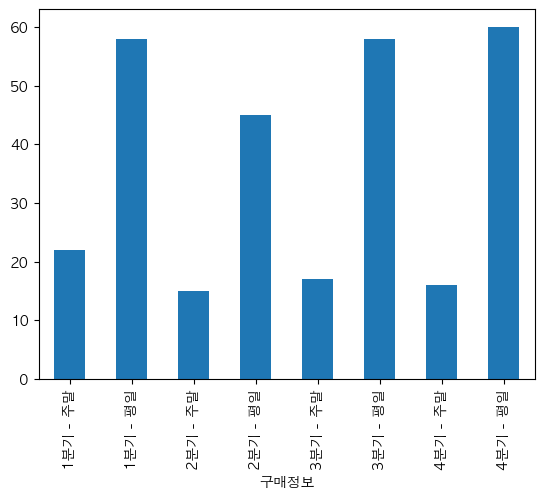

In [54]:
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.show()

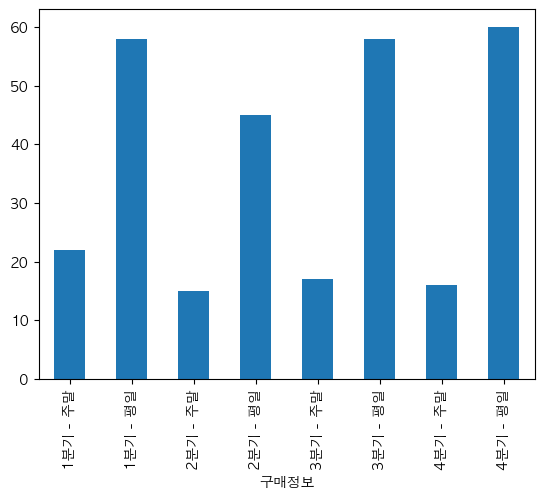

In [55]:
# 그래프로 시각화 하기
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.show()

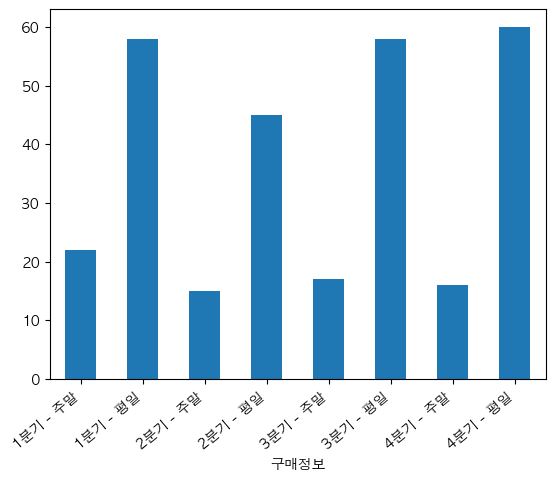

In [56]:
# x축 레이블을 40도 회전
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.xticks(rotation=40, ha='right')
plt.show()

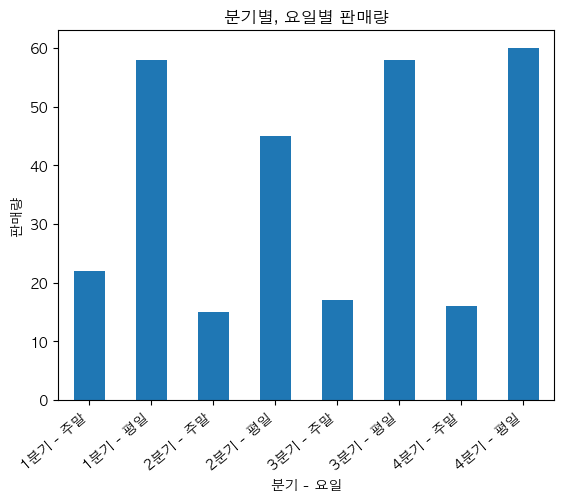

In [57]:
# 그래프 제목과 레이블 추가
result.plot(kind='bar', x='구매정보', y='판매량', legend=False)
plt.xticks(rotation=40, ha='right')
plt.title('분기별, 요일별 판매량')
plt.xlabel('분기 - 요일')
plt.ylabel('판매량')
plt.show()

In [ ]:
# 주말보다 평일 판매량이 높은 것을 확인할 수 있음
# 이유가 뭘까?

# 다른 분기에 비해 2분기 판매량이 낮음
# 이유가 뭘까?